In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Name / Data Type / Measurement Unit / Description


Sex / nominal / -- / M, F, and I (infant)

Length / continuous / mm / Longest shell measurement

Diameter / continuous / mm / perpendicular to length

Height / continuous / mm / with meat in shell

Whole weight / continuous / grams / whole abalone

Shucked weight / continuous / grams / weight of meat

Viscera weight / continuous / grams / gut weight (after bleeding)

Shell weight / continuous / grams / after being dried

Rings / integer / -- / +1.5 gives the age in years. 

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
LE = LabelEncoder()

In [8]:
df['gender'] = LE.fit_transform(df.Sex)

In [9]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,gender
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


Used label encoder for categorical variable SEX and saving it as gender

0 - F

1 - I

2 - M

In [10]:
df.drop(columns = ['Sex'],inplace = True)

In [11]:
df.shape

(4177, 9)

In [12]:
df.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,gender
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


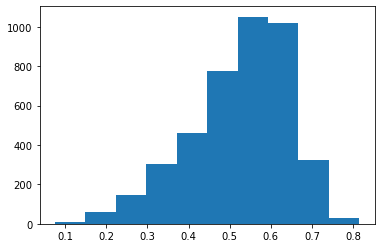

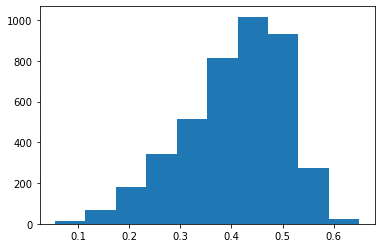

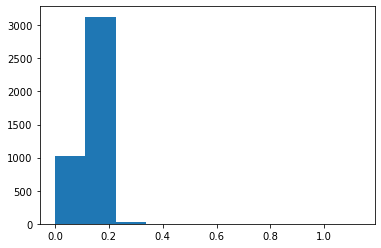

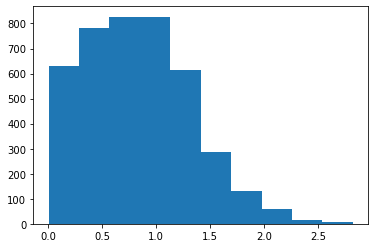

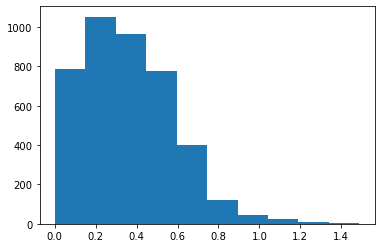

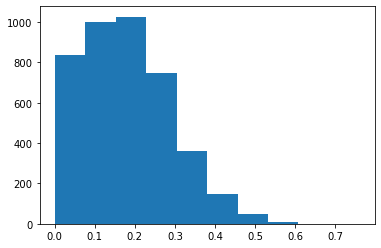

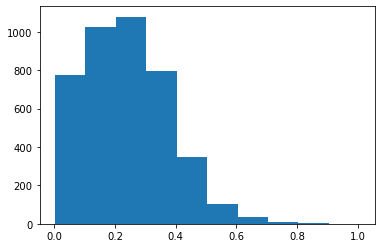

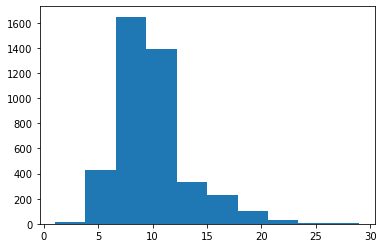

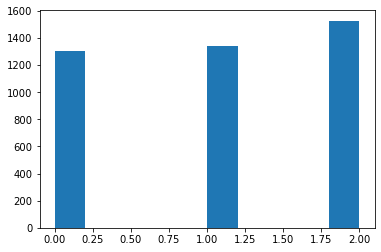

In [14]:
for i in df.columns:
    plt.subplots()
    plt.hist(df[i])

There is skewness in the data

In [15]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
gender           -0.098155
dtype: float64

Height and Rings have more skewness.

As rings is the target variable, it must not be transformed

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\AKHIL\anaconda3\lib\si

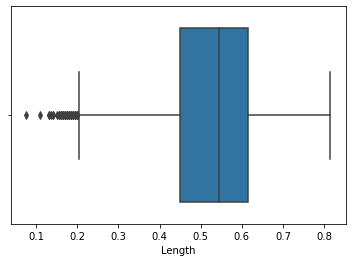

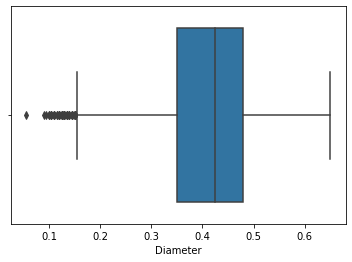

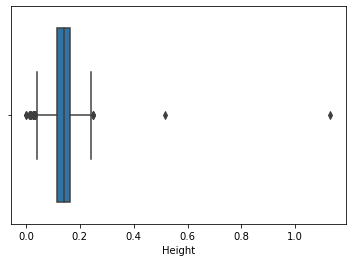

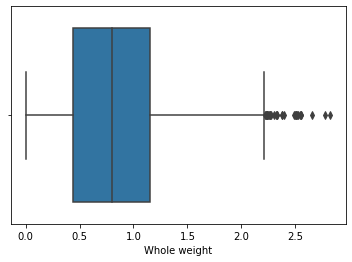

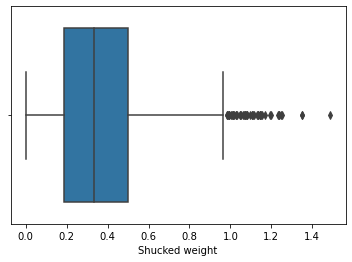

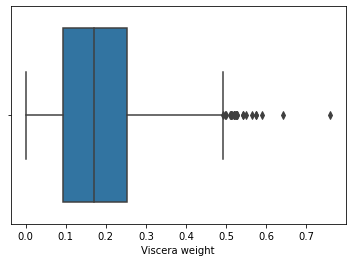

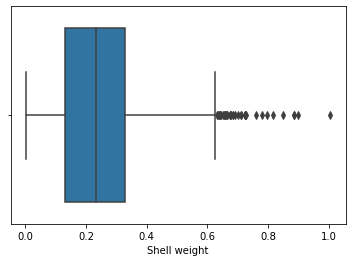

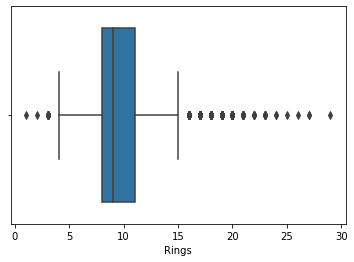

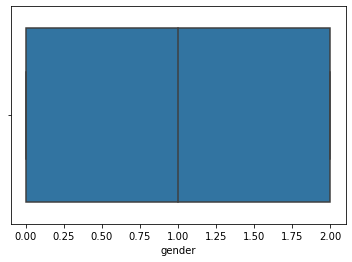

In [16]:
for i in df.columns:
    plt.subplots()
    sns.boxplot(df[i])

There are outliers present.
Length and diameter have outliers less than the min.

In [17]:
from scipy.stats import zscore

In [18]:
z = np.abs(zscore(df.drop(columns = ['gender','Rings'])))

In [19]:
z.shape

(4177, 7)

In [22]:
z_new = df[(z > -3).all(axis=1)]

In [23]:
z_new.shape

(4177, 9)

In [24]:
z_new1 = df[(z<3).all(axis=1)]

In [26]:
z_new1.shape

(4084, 9)

In [27]:
z_new1.skew()

Length           -0.633786
Diameter         -0.605450
Height           -0.247192
Whole weight      0.323886
Shucked weight    0.449573
Viscera weight    0.429932
Shell weight      0.358512
Rings             1.136367
gender           -0.092911
dtype: float64

The skewness is acceptable. Therefore, there is no need to transform the independent variables

C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AKHIL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

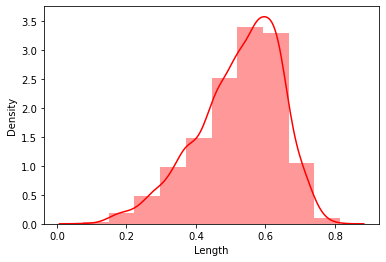

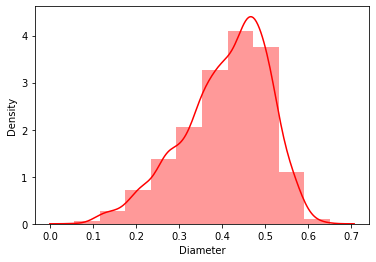

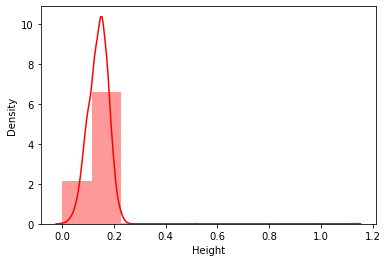

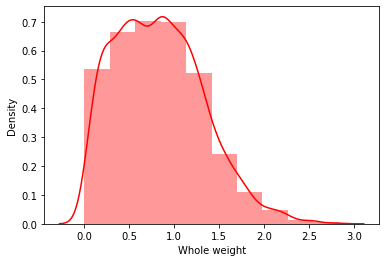

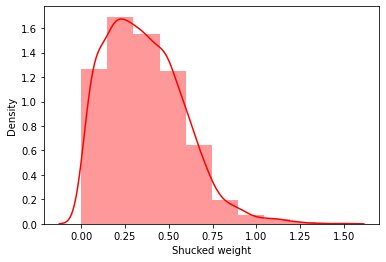

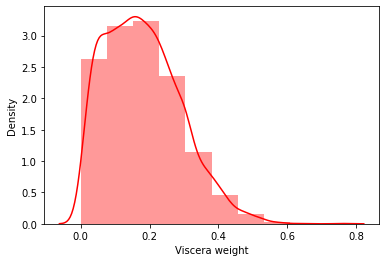

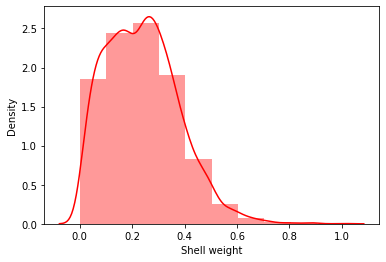

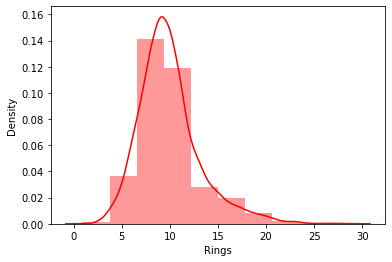

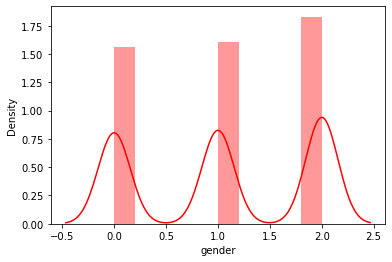

In [28]:
for i in z_new1.columns:
    plt.subplots()
    sns.distplot(df[i],bins = 10, color = 'r', label = z_new1.columns)

The distributions look a little skewed.

In [29]:
X = z_new1.drop(columns = ['Rings'])
Y = z_new1.Rings

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler = StandardScaler()
sdata = scaler.fit_transform(z_new1)

In [33]:
sdata

array([[-0.5798883 , -0.43102345, -1.17659224, ..., -0.64218694,
         1.61127154,  1.1577438 ],
       [-1.48745122, -1.47447322, -1.31174068, ..., -1.26010684,
        -0.9169901 ,  1.1577438 ],
       [ 0.06837092,  0.14287393, -0.09540474, ..., -0.17874702,
        -0.28492469, -1.28011425],
       ...,
       [ 0.67341287,  0.7167713 ,  1.79667339, ...,  0.57820485,
        -0.28492469,  1.1577438 ],
       [ 0.88949928,  0.82111628,  0.31004058, ...,  0.48551686,
         0.03110802, -1.28011425],
       [ 1.62419307,  1.55153111,  1.52637652, ...,  2.0225926 ,
         0.66317343,  1.1577438 ]])

In [35]:
sdata1 = pd.DataFrame(data = sdata, columns = z_new1.columns )

In [36]:
sdata1.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,gender
0,-0.579888,-0.431023,-1.176592,-0.643836,-0.610645,-0.731485,-0.642187,1.611272,1.157744
1,-1.487451,-1.474473,-1.311741,-1.274762,-1.218024,-1.239599,-1.260107,-0.916990,1.157744
2,0.068371,0.142874,-0.095405,-0.287369,-0.455155,-0.339512,-0.178747,-0.284925,-1.280114
3,-0.709540,-0.431023,-0.365702,-0.639463,-0.654376,-0.605666,-0.603567,0.031108,1.157744
4,-1.660320,-1.578818,-1.582038,-1.319594,-1.266615,-1.326704,-1.375967,-0.916990,-0.061185


In [37]:
X1 = sdata1.drop(columns = ['Rings'])
Y1 = sdata1.Rings

In [34]:
from sklearn.model_selection import train_test_split

In [39]:
xtrain,xtest,ytrain,ytest = train_test_split(X1,Y1, test_size = 0.3 , random_state = 15)

In [40]:
xtrain.shape

(2858, 8)

In [41]:
xtest.shape

(1226, 8)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
LR = LinearRegression()

LR.fit(xtrain,ytrain)
predlr = LR.predict(xtest)

In [44]:
from sklearn.metrics import r2_score, mean_squared_error

In [46]:
r2 = r2_score(ytest,predlr)
print(r2)

mse = mean_squared_error(ytest,predlr)
print(mse)

0.501814045841287
0.48113976824113425


In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
rfr = RandomForestRegressor()

rfr.fit(xtrain,ytrain)
predrf = rfr.predict(xtest)

print(r2_score(ytest,predrf))

0.521512686116406


In [49]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR,xtrain,ytrain,cv=5,scoring='r2')
    
print('CV Mean: ', np.mean(scores))

CV Mean:  0.527962806317209


In [53]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1).fit(xtrain, ytrain)

scores1 = cross_val_score(ridge,xtrain,ytrain,cv=5,scoring='r2')

scores1.mean()

0.528049838464603

In [54]:
from sklearn.model_selection import GridSearchCV

alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2')
grid_result = grid.fit(xtrain, ytrain)
print('Best score: ', grid_result.best_score_)
print('Best params: ', grid_result.best_params_)

Best score:  0.528049838464603
Best params:  {'alpha': 1}


There is no increase in r2 score from ridge and gridsearch cv

In [57]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1).fit(xtrain, ytrain)

scores2 = cross_val_score(lasso,xtrain,ytrain,cv=5,scoring = 'r2')

scores2.mean()

-0.0008752693882622786

After using lasso r2score is very low, hence, it is not the best model. Lets see with gridsearch cv for best parameters

In [58]:
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2')
grid_result = grid.fit(xtrain, ytrain)
print('Best score: ', grid_result.best_score_)
print('Best params: ', grid_result.best_params_)

Best score:  0.5276984958068708
Best params:  {'alpha': 0.001}


We got best alpha as 0.001, score as 0.527, not noticeable increase or decrease from previous models score. There fore, wee finalize the lasso model with these best params

In [59]:
lasso = Lasso(alpha=0.001).fit(xtrain, ytrain)

scores3 = cross_val_score(lasso,xtrain,ytrain,cv=5,scoring = 'r2')

scores3.mean()

0.5276984958068708

In [60]:
import pickle
filename = "abalone.pkl"
pickle.dump(lasso,open(filename,'wb'))


## Conclusion

Explored different linear models for regression:
Linear Regression,
 Ridge, and
 Lasso

We simplified our model with regularization but still the r2 score doesnt have a significant increase.
